In [1]:
import numpy as np
import matplotlib.pyplot as plt

n = 20

x = np.zeros(n,dtype=np.float32)
fx = np.zeros(n,dtype=np.float32)
fx_plus_h = np.zeros(n,dtype=np.float32)
fprime_exact = np.zeros(n,dtype=np.float32)
fprime_limit = np.zeros(n,dtype=np.float32)

diff = np.zeros(n,dtype=np.float32)

xval = 1.0

In [2]:
for i in range(0,n):

    hpower=i-n
    x[i]=10**int(hpower)
    fprime_exact[i]=3.0e+00*xval*xval
    fx[i]=xval*xval*xval
    fx_plus_h[i]=(xval+x[i])*(xval+x[i])*(xval+x[i]);

    fprime_limit[i]=(fx_plus_h[i]-fx[i])/(x[i]);

    diff[i]=np.abs(fprime_exact[i]-fprime_limit[i]);

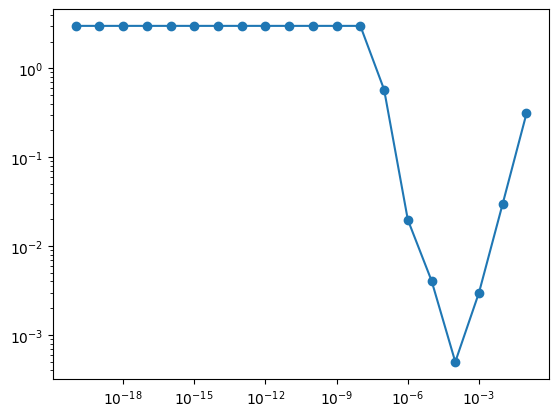

In [3]:
plt.plot(x,diff,'o-')
plt.xscale("log")
plt.yscale("log")

In [4]:
x = np.zeros(n)
fx = np.zeros(n)
fx_plus_h = np.zeros(n)
fprime_exact = np.zeros(n)
fprime_limit = np.zeros(n)

diff2 = np.zeros(n)

xval = 1.0

In [5]:
for i in range(0,n):

    hpower=i-n
    x[i]=10**int(hpower)
    fprime_exact[i]=3.0e+00*xval*xval
    fx[i]=xval*xval*xval
    fx_plus_h[i]=(xval+x[i])*(xval+x[i])*(xval+x[i]);

    fprime_limit[i]=(fx_plus_h[i]-fx[i])/(x[i]);

    diff2[i]=np.abs(fprime_exact[i]-fprime_limit[i]);

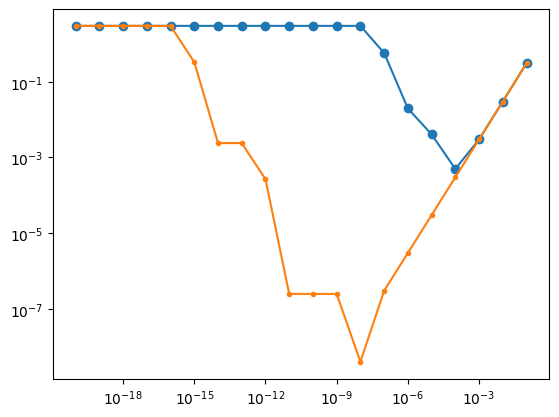

In [6]:
plt.plot(x,diff,'o-')
plt.plot(x,diff2,'.-')
plt.xscale("log")
plt.yscale("log")